<a href="https://colab.research.google.com/github/Poornimatagaram/Machine_learning_Projects/blob/MachineLearningProjects/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Wine Dataset

#Load Dataset

In [14]:
from sklearn.datasets import load_wine
import pandas as pd

wine=load_wine()
df=pd.DataFrame(data=wine.data,columns=wine.feature_names)
df['target']=wine.target
print(df['target'].value_counts())
print(df.head(5))
print(df.tail(5))

target
1    71
0    59
2    48
Name: count, dtype: int64
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od

Step 2: Explore Data

Check distributions: df.describe()

Visualize features: df.hist(figsize=(12,8))

Check correlations: df.corr()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [22]:
df.shape

(178, 14)

In [24]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


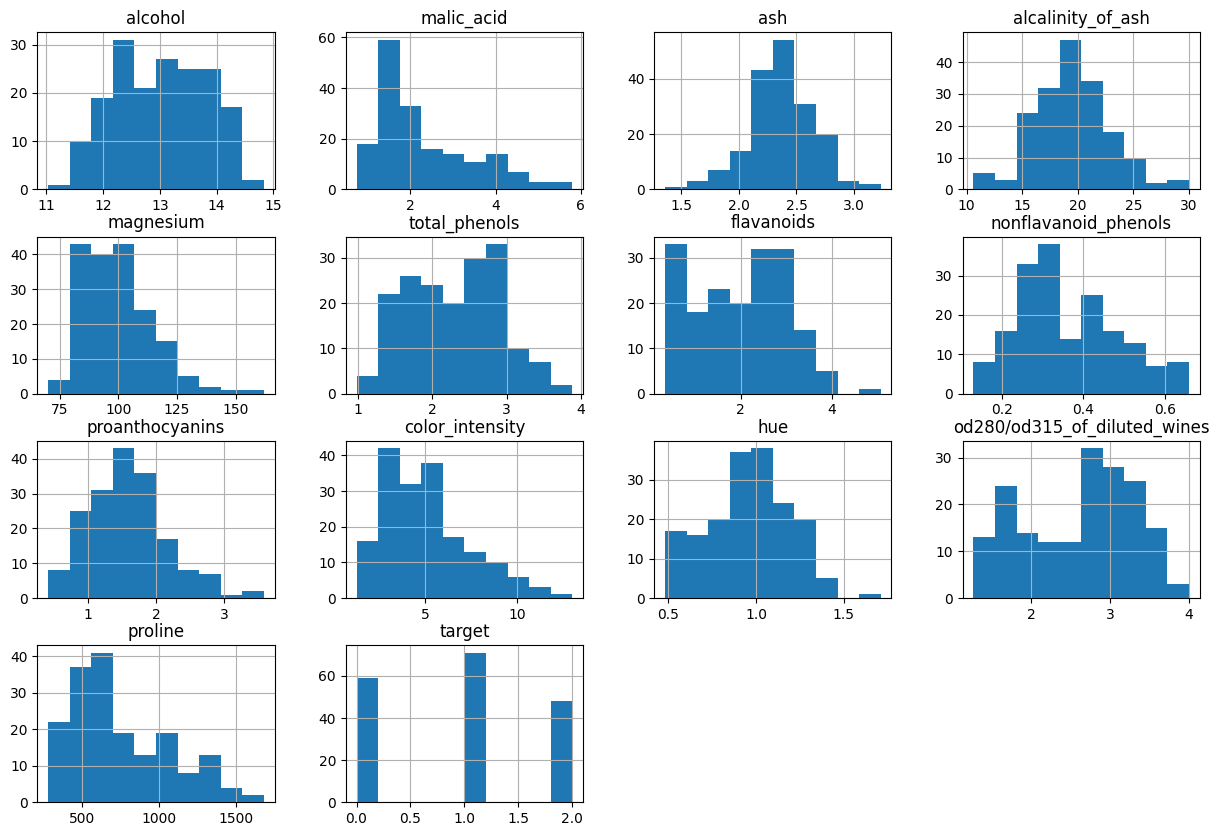

In [27]:
import matplotlib.pyplot as plt
df.hist(figsize=(15,10))
plt.show()

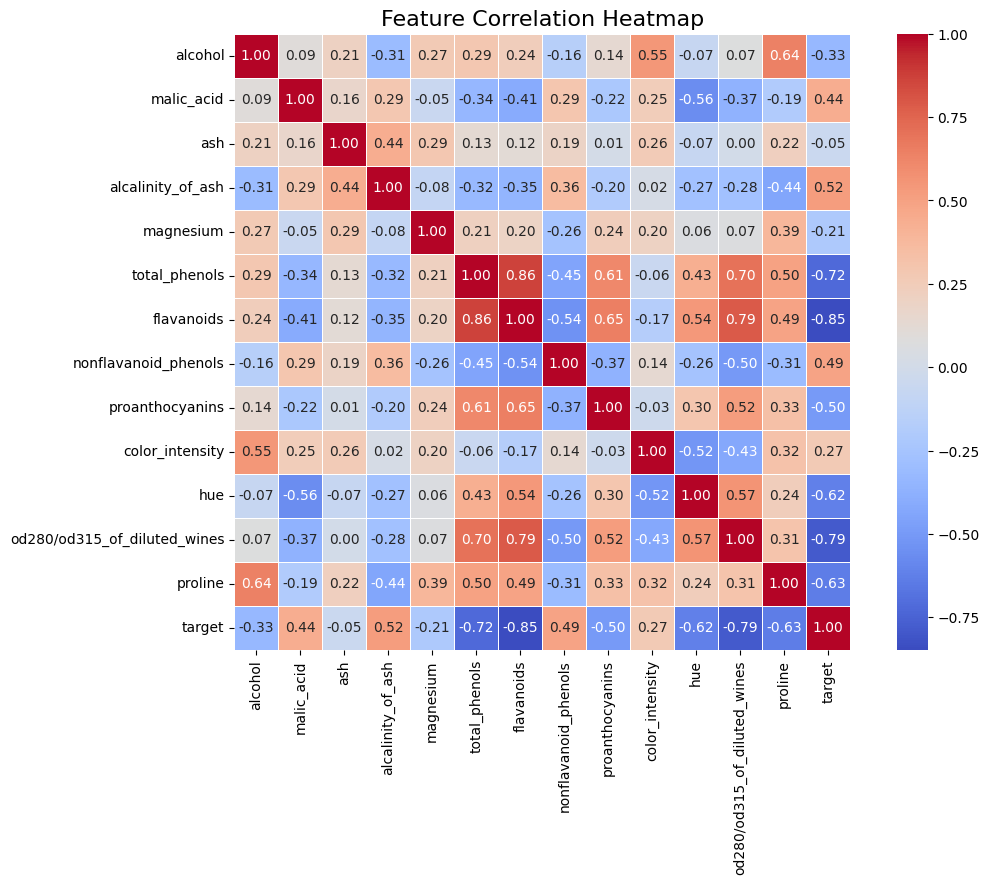

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df.corr()

# Set figure size
plt.figure(figsize=(12,8))

# Plot heatmap
sns.heatmap(
    corr,                  # correlation matrix
    annot=True,            # show correlation values
    fmt=".2f",             # 2 decimal places
    cmap="coolwarm",       # color palette
    cbar=True,             # show color bar
    square=True,           # make cells square
    linewidths=0.5,        # cell borders
    linecolor='white'
)

plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()


#Train-Test Split

In [40]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


#Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Train SVM

In [42]:
from sklearn.svm import SVC

# Linear kernel
svm_linear = SVC(kernel='linear', C=1, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# RBF kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma=0.5, random_state=42)
svm_rbf.fit(X_train_scaled, y_train)


SVC(C=1, gamma=0.5, random_state=42)

#Evaluate

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_linear = svm_linear.predict(X_test_scaled)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

print("Linear SVM\n", classification_report(y_test, y_pred_linear))
print("RBF SVM\n", classification_report(y_test, y_pred_rbf))


Linear SVM
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.93      0.93      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

RBF SVM
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.78      1.00      0.88        14
           2       1.00      0.70      0.82        10

    accuracy                           0.89        36
   macro avg       0.93      0.87      0.89        36
weighted avg       0.91      0.89      0.89        36



#Hyperparameter Tuning

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Params: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Best Score: 0.9862068965517242
